# Pre-assignment preperation
Here is the colab link: https://colab.research.google.com/drive/1WOaRWBfNtQ0SQpekLAuH1Xgqrfj94tEv


Importing packages and importing cvs files. The csv files are noted df_ to show remind us that they are dataframes

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df_trips = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/trips.csv')
df_travelers = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/people.csv')
df_countrylist = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv')



# 1. Preprocessing
**1a. Trips: transform dates into timestamps & 
1b.Calculate trip duration in days**



I use pd.to_data time to covert the data type of data_start & data_end to datetime from int. I specify the format, and coerce the errors to get it through.


In [3]:
df_trips['date_start'] = pd.to_datetime(df_trips['date_start'], format='%Y-%m-%d',errors='coerce')
df_trips['date_end'] = pd.to_datetime(df_trips['date_end'], format='%Y-%m-%d',errors='coerce')
df_trips['duration'] = df_trips['date_end'] - df_trips['date_start']
print(df_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46510 entries, 0 to 46509
Data columns (total 12 columns):
Unnamed: 0      46510 non-null int64
username        46510 non-null object
country         46473 non-null object
country_code    45909 non-null object
country_slug    46473 non-null object
date_end        46285 non-null datetime64[ns]
date_start      46493 non-null datetime64[ns]
latitude        46510 non-null int64
longitude       46510 non-null int64
place           46510 non-null object
place_slug      46473 non-null object
duration        46275 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(6), timedelta64[ns](1)
memory usage: 4.3+ MB
None


**1c. Filter extreme (fake?) observations for durations as well as dates - start and end.**


I clean the data frame by dropping rows with na in date_start & date_end

I drop all observations where the trip duration is 0 days, since they do not fit the trip duration definition.

In [4]:
df_trips_clean1 = df_trips.dropna(subset=['date_start', 'date_end'])
df_trips_clean1 = df_trips_clean1[df_trips['duration']!= '0 days']
df_trips_clean1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44719 entries, 0 to 46509
Data columns (total 12 columns):
Unnamed: 0      44719 non-null int64
username        44719 non-null object
country         44686 non-null object
country_code    44160 non-null object
country_slug    44686 non-null object
date_end        44719 non-null datetime64[ns]
date_start      44719 non-null datetime64[ns]
latitude        44719 non-null int64
longitude       44719 non-null int64
place           44719 non-null object
place_slug      44686 non-null object
duration        44719 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(6), timedelta64[ns](1)
memory usage: 4.4+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


I creat a list 'outlier_duration' and use it to filter out outliers for duration. 

I filter out observations which data exede 2020 to remove posible date outliers

In [0]:
outlier_duration = np.percentile(df_trips_clean1.duration, [1, 97])
df_trips_clean2 = df_trips_clean1[(df_trips_clean1.duration > outlier_duration[0]) & (df_trips_clean1.duration < outlier_duration[1])]
df_trips_clean2 = df_trips_clean2[(df_trips_clean2.date_start < '01-01-2020')]


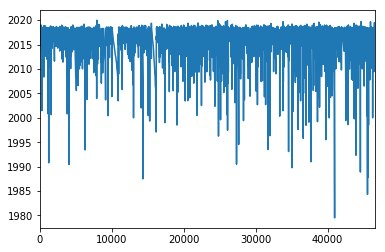

In [6]:
df_trips_clean2.date_start.plot()
plt.show()

**1d. Join the countrylist data to the trips data-frame using the countrycode as a key &**

**1e. Set DateTime index as the start date of a trip**

d: I left-join countrylist and trips_clean into a new dataframe df_data using pd.merge
I rename 'alpha_2' to country_code, so when i join them using the column countrycode them combinde into one columb.

e: I set date_start as the index for df_data using the ".set_index method", and then sort the data via the ".sort_values" method.

In [7]:

df_countrylist1 = df_countrylist.rename(columns={'alpha_2':'country_code'})
df_data=pd.merge(df_trips_clean2, df_countrylist1, how='left', left_on='country_code', right_on='country_code')
df_data=df_data.set_index('date_start')
df_data=df_data.sort_values('date_start')
df_data.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,latitude,longitude,place,place_slug,duration,region,sub_region
date_start,,,,,,,,,,,,,
1979-07-02,40967,@allan,United States,US,united-states,1979-07-05,42,-78,Buffalo,buffalo-ny-united-states,3 days,Americas,Northern America
1981-07-12,40965,@allan,United States,US,united-states,1981-07-26,25,-80,Miami,miami-fl-united-states,14 days,Americas,Northern America
1981-07-26,40964,@allan,Canada,CA,canada,1981-12-12,51,-85,Ontario,canada,139 days,Americas,Northern America
1981-12-12,40963,@allan,Denmark,DK,denmark,1982-01-08,55,9,Hedensted,denmark,27 days,Europe,Northern Europe
1983-12-12,40961,@allan,Colombia,CO,colombia,1984-01-08,4,-74,Bogota,bogota-colombia,27 days,Americas,Latin America and the Caribbean


# 2. People
**2a. How many people have at least a “High School” diploma?**

I use the .str.contains method to finde the rows the contain High School.
the output of this is a bunch of true and false rows. I then sum those rows which gives me the number of true rows since true has the value 1 and false has the value 0

In [8]:
df_travelers['education_raw'].str.contains('High School').sum()

130

**2b. How many people working with “Software Dev” have a “Master's Degree”?**

I use the .str.contrains method ands save the result to software.

The "&"" makes is so that False&False = False, True&False = False, True&True = True

In [9]:
software = df_travelers['work_raw'].str.contains('Software Dev') & df_travelers['education_raw'].str.contains("Master's Degree")
print(software.sum())
print(df_travelers['education_raw'].str.contains("Master's Degree").sum())
print(df_travelers['work_raw'].str.contains('Software Dev').sum())

57
153
381


**2c. Who is the person with a Master's Degree that has the highest number of followers?**

I creat a data frame containing where .str.contains Master's Degree == True

I then sort by followers to find the most followed person with as Master's

In [10]:
df_edu = df_travelers[df_travelers['education_raw'].str.contains("Master's Degree") > 0]
df_edu.sort_values('followers').tail()


,Unnamed: 0,username,followers,following,work_raw,education_raw
3036,3036,@html5cat,32,18,"Software Dev, Mobile Dev, Startup Founder, Pro...",Master's Degree
609,609,@zackllnyoung,60,92,"Startup Founder, Blogging, Coach, Marketing","High School, Bachelor's Degree, Master's Degree"
1949,1949,@neosilky,102,6,"Web Dev, Software Dev","High School, Bachelor's Degree, Master's Degree"
1298,1298,@aaz,259,46,"Web Dev, Software Dev, Startup Founder, Bloggi...","High School, Bachelor's Degree, Master's Degree"
2043,2043,@levelsio,2182,353,"Software Dev, Startup Founder, Creative","High School, Bachelor's Degree, Master's Degree"


# 3. Trips

**3a. Which country received the highest number of trips?**

I use the ".value_counts" method on the coloumn 'country' to finde the unique value which has the most entries and there the most amount of trips

In [11]:
df_data['country'].value_counts()

United States                       6971
Thailand                            3278
United Kingdom                      2055
Spain                               1876
Germany                             1815
France                              1391
Indonesia                           1303
China                               1066
Italy                               1043
Netherlands                          989
Japan                                972
Canada                               959
Vietnam                              941
Australia                            915
Malaysia                             863
Mexico                               859
Portugal                             805
India                                647
Brazil                               557
Singapore                            516
Colombia                             507
Russia                               467
Hungary                              453
New Zealand                          441
Poland          

**3b. Which country received the highest number of trips in 2017?**

I use the .loc method to select all enteries in 2017 and store them in a new data frame. This is posible since the original dataframe has a time datatype as it's index.

Then I use a .value_counts() method again

In [12]:
df2017 = df_data.loc['2017']
df2017['country'].value_counts()

United States                       1824
Thailand                             894
United Kingdom                       612
Spain                                598
Germany                              456
France                               391
Indonesia                            375
Vietnam                              357
Mexico                               316
Portugal                             305
Italy                                299
Netherlands                          293
Malaysia                             287
Australia                            246
Japan                                241
Canada                               239
China                                223
Colombia                             192
Brazil                               169
India                                169
Singapore                            153
Russia                               147
Hungary                              139
New Zealand                          137
Poland          

**3c. Which is the country in 'Eastern Asia' where travellers spent on average least time when
going there?**

I create new dataframe where the boonleen argument is true.

Then I group the observations by country and find thier duration mean.

I use parse numeric_only=False as an argument into my .mean method to since durations is the Timedelta data type.

Finally i plot the data using a bar-chart

In [0]:
df_east = df_data[df_data['sub_region']=='Eastern Asia']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


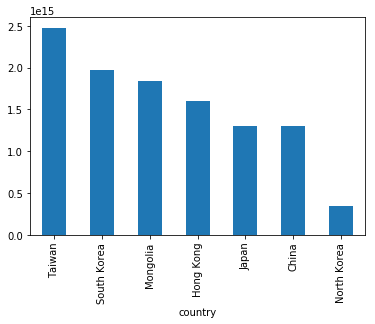

In [14]:
df_east.groupby('country').duration.mean(numeric_only=False).sort_values(ascending=False).plot(kind='bar')


**3d. Do nomads that indicate working in “Software Dev” tend to have shorter or longer trips on
average?**

First I left join the data using pd.merge

Then I create two dataframes where containing software devs and people who are not software devs, and take the mean of each group

In [0]:
df_data2=pd.merge(df_data, df_travelers, how='left', left_on='username', right_on='username')

In [16]:
df_soft = df_data2[df_data2['work_raw'].str.contains("Software Dev") > 0]
df_nsoft = df_data2[df_data2['work_raw'].str.contains("Software Dev") == 0]
print(df_nsoft.duration.mean(numeric_only=False))
print(df_soft.duration.mean(numeric_only=False))

18 days 07:40:27.256678
16 days 23:08:08.642659


# 3d. The part I have been stuck on the past many days
**Visualize over-time median trip duration overall**

I use the groupby function to group by week and plot the median duration over time.

The problems accure one i try see this subset with by country

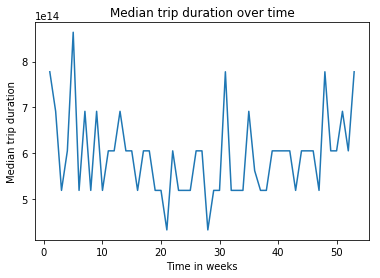

In [17]:
median_time=df_data.groupby(df_data.index.week)['duration'].median(numeric_only=False)
plt.plot(median_time,)
plt.xlabel('Time in weeks')
plt.ylabel('Median trip duration')
plt.title('Median trip duration over time')
plt.show()

# The broken part
Here is the code i was experimenting with to try to subset by country and take the median duration

The piece of code below doesn't resample duration since its in the Timedalta datatype

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/groupby.py:1436: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).median().bfill()
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


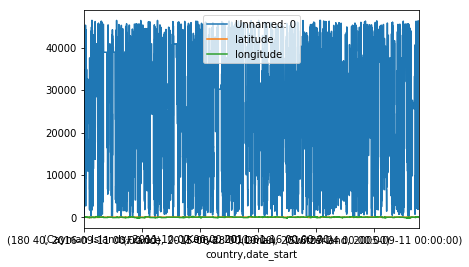

In [18]:
test = df_data.groupby('country').resample('1w', fill_method='bfill', how='median')
test.plot()

Grouping by multiple factors doesn't work either

In [21]:
df_data2.groupby('country',df_data.index.week)['duration'].median(numeric_only=False)

TypeError: ignored